In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [ ]:
mnist_data, info = tfds.load("fashion_mnist", with_info='true')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWYWSGH/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWYWSGH/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [ ]:
sentences = [
             'I love dog',
             'I love cat',
             'I love a cat',
             'I love a cat?'
]

tokenizer = Tokenizer(num_words=100) #分割句子為字元
tokenizer.fit_on_texts(sentences) #轉換字元為數字
wordIndex = tokenizer.word_index #獲取轉換結果
print(wordIndex) #印出轉換結果

{'i': 1, 'love': 2, 'cat': 3, 'a': 4, 'dog': 5}


In [ ]:
sentences = [
             'I love dog',
             'I love cat',
             'I love a cat',
             'I love a cat?'
]

tokenizer = Tokenizer(num_words=100) #分割句子為字元
tokenizer.fit_on_texts(sentences) #轉換字元為數字
sqeuences = tokenizer.texts_to_sequences(sentences) #將數字重新組合為句子
print(sqeuences)#印出結果

[[1, 2, 5], [1, 2, 3], [1, 2, 4, 3], [1, 2, 4, 3]]


In [ ]:
testData = [
             'I love pig',
             'I love a goat'
]

sqeuences = tokenizer.texts_to_sequences(testData)
print(sqeuences)

[[1, 2], [1, 2, 4]]


In [ ]:
tokenizer = Tokenizer(num_words=100, oov_token='OOV') #設定‘OOV’
tokenizer.fit_on_texts(sentences)
sqeuences = tokenizer.texts_to_sequences(testData)
wordIndex = tokenizer.word_index
print(wordIndex)
print(sqeuences)

{'OOV': 1, 'i': 2, 'love': 3, 'cat': 4, 'a': 5, 'dog': 6}
[[2, 3, 1], [2, 3, 5, 1]]


In [ ]:
#取得imdb_reviews資料集中train的部分
tranData = tfds.load('imdb_reviews', split='train')

In [ ]:
#建立空list
imdbSentences = list()

#依序取出句子，轉換為string之後存進list
for item in tranData:
  imdbSentences.append(str(item['text']))

print(imdbSentences[0])

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


In [ ]:
#Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdbSentences)

wordIndex = tokenizer.word_index
print(wordIndex)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, "'s": 20, 'on': 21, 'you': 22, 'not': 23, 'are': 24, 'his': 25, 'he': 26, 'have': 27, 'be': 28, 'one': 29, 'shape': 30, 'string': 31, 'tf': 32, 'tensor': 33, 'dtype': 34, 'all': 35, 'at': 36, 'by': 37, 'they': 38, 'an': 39, 'who': 40, 'so': 41, 'from': 42, 'like': 43, 'her': 44, "'t": 45, 'or': 46, 'just': 47, 'there': 48, 'about': 49, 'out': 50, "'": 51, 'has': 52, 'if': 53, 'some': 54, 'what': 55, 'good': 56, 'more': 57, 'very': 58, 'when': 59, 'she': 60, 'up': 61, 'can': 62, 'b': 63, 'time': 64, 'no': 65, 'even': 66, 'my': 67, 'would': 68, 'which': 69, 'story': 70, 'only': 71, 'really': 72, 'see': 73, 'their': 74, 'had': 75, 'were': 76, 'me': 77, 'well': 78, 'we': 79, 'than': 80, 'much': 81, 'been': 82, 'get': 83, 'bad': 84, 'will': 85, 'people': 86, 'do': 87, 'also': 88, 'other': 89, 'into

In [2]:
vocab_size = 1000 #文字總數
embedding_dim = 16 #Coefficients 數量
max_length = 120 #句子最大長度
trunc_type = 'post' #切割類型
padding_type = 'post' #填字類型
oov_tok = "<OOV>" #OOV

In [ ]:
import json

#讀檔
with open("/content/sarcasmDataset.json", 'r') as f:
  data = json.load(f)

#建立lists
sentences = list()
labels = list()
urls = list()

#依序存取json block, 並將內容放至對應list
for item in data:
  sentence = item['headline'].lower()
  sentences.append(sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [17]:
import csv

sentences = list()
labels = list()
urls = list()

# 開啟 CSV 檔案, 讀取檔案後存進對應list
with open('/content/SarcasmDataset.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  next(rows)
  for row in rows:
    labels.append(int(row[0]))
    sentences.append(row[1])
    urls.append(row[2])

print(str.format("label: {}, sentence: {}, url: {}", labels[0], sentences[0], urls[0]))

label: 1, sentence: thirtysomething scientists unveil doomsday clock of hair loss, url: https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205


In [18]:
#句子總數
print(len(sentences))

28619


In [19]:
#設定訓練集資料量
training_size = 24000

#取得前24000筆資料
training_sentences = sentences[0:training_size]
#取得24000筆後所有資料
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [20]:
print(testing_sentences)

['obama asks biden not to stand so close', "judge restricts roger stone's travel between fox news, infowars studios while released on bond", 'new technologies give government ample means to track suspects, study finds', "national review writer: ben carson 'more authentically black' than obama", 'who admits it botched response to ebola outbreak', 'disillusioned hollywood sign moves back to small iowa farm town', 'these newlyweds have god-like locks and the internet is living for it', "woman knows exactly which knife she'd grab out of cutlery drawer in event of home invasion", 'researchers discover female frogs prefer mate who knows way around the cloaca', 'my friend michael and the power of acknowledgement', "garth and kat visit 'snl' for hanukkah", "is there such a thing as 'too much' coffee?", 'how pirates and hackers worked together to steal millions of dollars in diamonds', 'senator from troubled home state repeatedly acting out in congress', 'snake on a plane! reptile slithers out 

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_sequences = tokenizer.texts_to_sequences(training_sentences)
#將句子設定為固定長度, 句尾補0
training_padded = pad_sequences(training_sequences, maxlen=120, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [23]:
print(testing_padded[0])

[ 72 370 655  29   2 743 102   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


In [24]:
#將資料轉換為numpy array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [25]:
print(training_padded[0])
print(training_labels[0])
print(testing_padded[0])
print(testing_labels[0])

[  1 317   1   1   1   3 649 990   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
1
[ 72 370 655  29   2 743 102   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
1


In [26]:
#建立model
model = keras.Sequential(
    [
     keras.layers.Embedding(10000, 16),
     keras.layers.GlobalAveragePooling1D(),
     keras.layers.Dense(24, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [28]:
#開始訓練model
history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
750/750 [==============================] - 4s 6ms/step - loss: 0.5323 - accuracy: 0.7605 - val_loss: 0.4485 - val_accuracy: 0.7945
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.4169 - accuracy: 0.8104 - val_loss: 0.4184 - val_accuracy: 0.8030
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3907 - accuracy: 0.8221 - val_loss: 0.4033 - val_accuracy: 0.8106
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3813 - accuracy: 0.8249 - val_loss: 0.4088 - val_accuracy: 0.8045
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3723 - accuracy: 0.8302 - val_loss: 0.4010 - val_accuracy: 0.8071
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3684 - accuracy: 0.8304 - val_loss: 0.3962 - val_accuracy: 0.8145
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3656 - accuracy: 0.8340 - val_loss: 0.4008 - val_accuracy: 0.8173
Epoch 

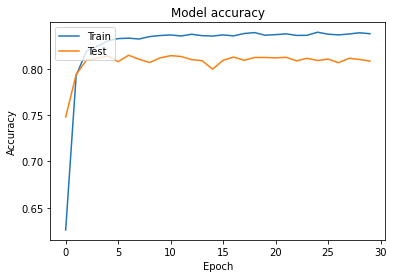

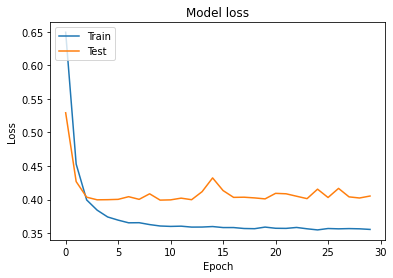

In [ ]:
#將結果以line chart顯示
import matplotlib.pyplot as plt

#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#儲存model
model.save('NLP_model_1.h5')

In [ ]:
#增加hidden layers
model = keras.Sequential(
    [
     keras.layers.Embedding(10000, 16),
     keras.layers.GlobalAveragePooling1D(),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 170,497
Trainable params: 170,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3792 - accuracy: 0.8262 - val_loss: 0.3992 - val_accuracy: 0.8080
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3725 - accuracy: 0.8270 - val_loss: 0.3951 - val_accuracy: 0.8116
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3696 - accuracy: 0.8291 - val_loss: 0.4490 - val_accuracy: 0.7876
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3702 - accuracy: 0.8285 - val_loss: 0.4133 - val_accuracy: 0.8082
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3706 - accuracy: 0.8303 - val_loss: 0.4030 - val_accuracy: 0.8142
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3672 - accuracy: 0.8332 - val_loss: 0.3973 - val_accuracy: 0.8108
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3642 - accuracy: 0.8337 - val_loss: 0.3989 - val_accuracy: 0.8106
Epoch 

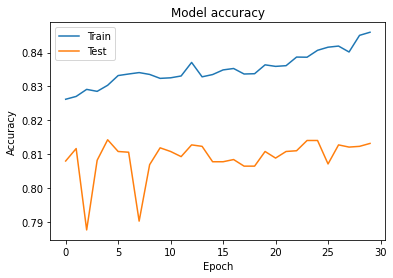

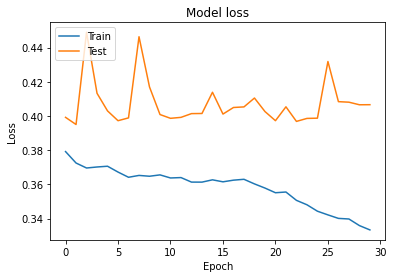

In [ ]:
#將結果以line chart顯示
import matplotlib.pyplot as plt

#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('NLP_model_2.h5')

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(10000, 16),
     keras.layers.Bidirectional(keras.layers.LSTM(16)), #改用LSTM
     keras.layers.Dense(24, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 165,041
Trainable params: 165,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
750/750 [==============================] - 17s 12ms/step - loss: 0.4491 - accuracy: 0.7799 - val_loss: 0.3862 - val_accuracy: 0.8151
Epoch 2/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3666 - accuracy: 0.8313 - val_loss: 0.3765 - val_accuracy: 0.8242
Epoch 3/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3483 - accuracy: 0.8410 - val_loss: 0.3667 - val_accuracy: 0.8238
Epoch 4/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3315 - accuracy: 0.8515 - val_loss: 0.3709 - val_accuracy: 0.8205
Epoch 5/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3170 - accuracy: 0.8593 - val_loss: 0.3590 - val_accuracy: 0.8324
Epoch 6/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3060 - accuracy: 0.8658 - val_loss: 0.3743 - val_accuracy: 0.8311
Epoch 7/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2965 - accuracy: 0.8692 - val_loss: 0.3648 - val_accuracy: 0.835

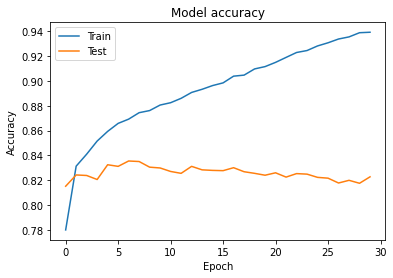

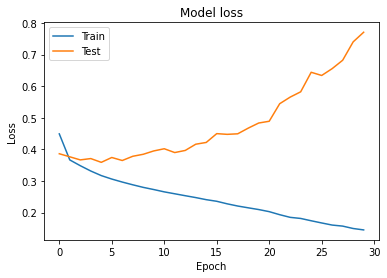

In [ ]:
#將結果以line chart顯示
import matplotlib.pyplot as plt

#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('NLP_Model_3.h5')

In [ ]:
#下載資料
!wget --no-check-certificate \
  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip \
  - 0 /content/glove.zip

--2021-11-09 07:06:12--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip
Resolving huggingface.co (huggingface.co)... 54.172.174.13, 52.2.41.196, 2600:1f18:147f:e800:7584:a2d2:812e:6bd7, ...
Connecting to huggingface.co (huggingface.co)|54.172.174.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/stanfordnlp/glove/3123e7f5c3f6a30095d413b12fc3284bbf717acd2a9bed63d1c7c13bf5223352 [following]
--2021-11-09 07:06:12--  https://cdn-lfs.huggingface.co/stanfordnlp/glove/3123e7f5c3f6a30095d413b12fc3284bbf717acd2a9bed63d1c7c13bf5223352
Resolving cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)... 52.84.18.102, 52.84.18.77, 52.84.18.124, ...
Connecting to cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)|52.84.18.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408741 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1

In [ ]:
import zipfile

#解壓縮
f = '/content/glove.twitter.27B.zip'
zip = zipfile.ZipFile(f, 'r')
zip.extractall('/content')
zip.close()

In [ ]:
glove_embdding = dict()
#讀取檔案, 並將文字與coefficients取出
with open('/content/glove.twitter.27B.25d.txt', 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embdding[word] = coefs

In [ ]:
#印出結果
print(glove_embdding['frog'])

[-1.2158   -0.74924   0.91941   0.72985  -0.12917  -0.19555   1.2365
 -0.77196   0.85161   0.11922   0.16816   0.33334  -2.0845   -0.53471
  0.013538  0.18178   1.2831    0.089331  0.57264   0.50694   0.27134
  0.66504   0.54097  -0.58377   0.67097 ]


In [ ]:
#設定文字數量
vocab_size = 13200
#設定embedding輸出數量
embedding_dim = 25

#預先建立空的array
embedding_matrix = np.zeros((vocab_size, embedding_dim))

#取出coefficients並存進array
for word, index in tokenizer.word_index.items():
  if index > vocab_size - 1:
    break
  else:
    embedding_vector = glove_embdding.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
#建立model, 使用兩層LSTM
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(24, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 25)          330000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 50)          10200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1224      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 356,649
Trainable params: 26,649
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
  2/750 [..............................] - ETA: 41s - loss: 0.7005 - accuracy: 0.3906

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


750/750 [==============================] - 43s 57ms/step - loss: 0.5597 - accuracy: 0.6915 - val_loss: 0.4783 - val_accuracy: 0.7619
Epoch 2/30
750/750 [==============================] - 42s 57ms/step - loss: 0.4633 - accuracy: 0.7695 - val_loss: 0.4402 - val_accuracy: 0.7850
Epoch 3/30
750/750 [==============================] - 43s 57ms/step - loss: 0.4327 - accuracy: 0.7895 - val_loss: 0.4202 - val_accuracy: 0.8013
Epoch 4/30
750/750 [==============================] - 43s 57ms/step - loss: 0.4086 - accuracy: 0.8071 - val_loss: 0.4064 - val_accuracy: 0.8093
Epoch 5/30
750/750 [==============================] - 41s 54ms/step - loss: 0.3911 - accuracy: 0.8162 - val_loss: 0.4147 - val_accuracy: 0.8004
Epoch 6/30
750/750 [==============================] - 41s 54ms/step - loss: 0.3798 - accuracy: 0.8223 - val_loss: 0.3994 - val_accuracy: 0.8067
Epoch 7/30
750/750 [==============================] - 42s 57ms/step - loss: 0.3678 - accuracy: 0.8278 - val_loss: 0.4013 - val_accuracy: 0.8101
Epo

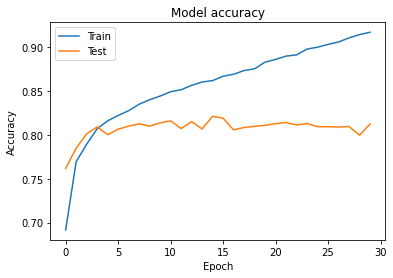

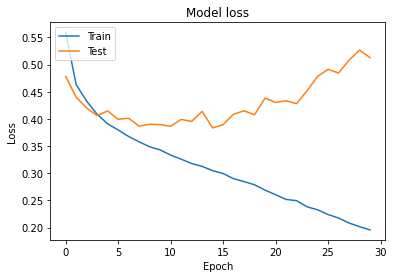

In [ ]:
#將結果以line chart顯示
import matplotlib.pyplot as plt

#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('NLP_Model_4.h5')

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

#調整optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 25)          330000    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, None, 50)          10200     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 50)                15200     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 356,233
Trainable params: 26,233
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
  history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
  2/750 [..............................] - ETA: 39s - loss: 0.6916 - accuracy: 0.5469

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


750/750 [==============================] - 44s 59ms/step - loss: 0.6893 - accuracy: 0.5367 - val_loss: 0.6866 - val_accuracy: 0.5441
Epoch 2/30
750/750 [==============================] - 45s 60ms/step - loss: 0.6861 - accuracy: 0.5340 - val_loss: 0.6828 - val_accuracy: 0.5538
Epoch 3/30
750/750 [==============================] - 48s 64ms/step - loss: 0.6822 - accuracy: 0.5518 - val_loss: 0.6779 - val_accuracy: 0.5804
Epoch 4/30
750/750 [==============================] - 45s 60ms/step - loss: 0.6770 - accuracy: 0.5781 - val_loss: 0.6713 - val_accuracy: 0.6081
Epoch 5/30
750/750 [==============================] - 44s 59ms/step - loss: 0.6697 - accuracy: 0.6050 - val_loss: 0.6622 - val_accuracy: 0.6352
Epoch 6/30
750/750 [==============================] - 46s 61ms/step - loss: 0.6597 - accuracy: 0.6305 - val_loss: 0.6500 - val_accuracy: 0.6456
Epoch 7/30
750/750 [==============================] - 45s 60ms/step - loss: 0.6468 - accuracy: 0.6477 - val_loss: 0.6348 - val_accuracy: 0.6614
Epo

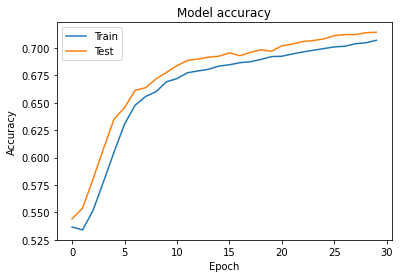

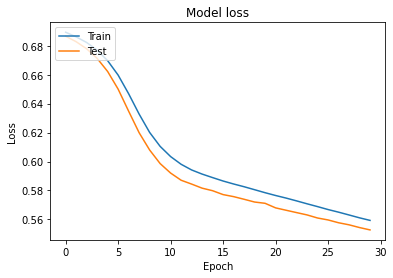

In [ ]:
#將結果以line chart顯示
import matplotlib.pyplot as plt

#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 25)          330000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 50)          10200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 356,233
Trainable params: 26,233
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=50, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/50
750/750 [==============================] - 100s 120ms/step - loss: 0.6925 - accuracy: 0.4940 - val_loss: 0.6875 - val_accuracy: 0.5317
Epoch 2/50
750/750 [==============================] - 88s 118ms/step - loss: 0.6858 - accuracy: 0.5241 - val_loss: 0.6812 - val_accuracy: 0.5371
Epoch 3/50
750/750 [==============================] - 88s 118ms/step - loss: 0.6804 - accuracy: 0.5415 - val_loss: 0.6745 - val_accuracy: 0.5837
Epoch 4/50
750/750 [==============================] - 88s 118ms/step - loss: 0.6724 - accuracy: 0.5839 - val_loss: 0.6637 - val_accuracy: 0.6174
Epoch 5/50
750/750 [==============================] - 89s 118ms/step - loss: 0.6610 - accuracy: 0.6179 - val_loss: 0.6498 - val_accuracy: 0.6443
Epoch 6/50
750/750 [==============================] - 89s 118ms/step - loss: 0.6460 - accuracy: 0.6415 - val_loss: 0.6307 - val_accuracy: 0.6655
Epoch 7/50
750/750 [==============================] - 89s 118ms/step - loss: 0.6291 - accuracy: 0.6535 - val_loss: 0.6131 - val_a

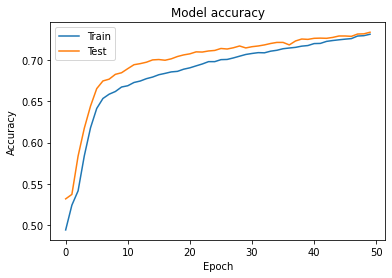

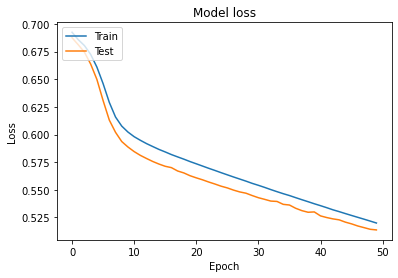

In [ ]:
#將結果以line chart顯示
import matplotlib.pyplot as plt

#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('NLP_Model_5.h5')

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 25)          330000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 50)          10200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 356,233
Trainable params: 26,233
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=70, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/70
750/750 [==============================] - 100s 120ms/step - loss: 0.6892 - accuracy: 0.5239 - val_loss: 0.6859 - val_accuracy: 0.5332
Epoch 2/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6844 - accuracy: 0.5504 - val_loss: 0.6808 - val_accuracy: 0.5687
Epoch 3/70
750/750 [==============================] - 88s 118ms/step - loss: 0.6790 - accuracy: 0.5754 - val_loss: 0.6744 - val_accuracy: 0.6014
Epoch 4/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6710 - accuracy: 0.6038 - val_loss: 0.6627 - val_accuracy: 0.6220
Epoch 5/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6585 - accuracy: 0.6197 - val_loss: 0.6496 - val_accuracy: 0.6361
Epoch 6/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6460 - accuracy: 0.6312 - val_loss: 0.6371 - val_accuracy: 0.6439
Epoch 7/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6349 - accuracy: 0.6391 - val_loss: 0.6270 - val_a

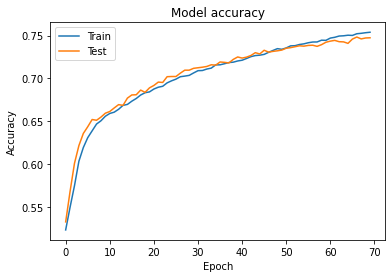

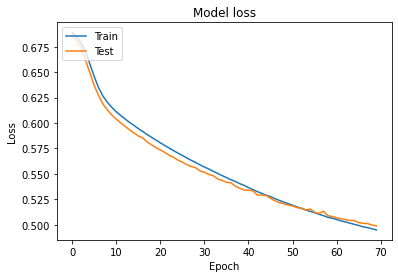

In [ ]:
#將結果以line chart顯示
import matplotlib.pyplot as plt

#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#下載model
from google.colab import files

files.download('NLP_model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#讀取model
import keras

model = keras.models.load_model('/content/NLP_model_1.h5')

In [ ]:
#建立測試字串
test_sequences = [
                  "Today is a sunny day",
                  "It was, For, Uh, Medcial Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Hime Hairvut",
                  "Pokémon Go player stabbed, keeps playing",
                  "thirtysomething scientists unveil doomsday clock of hair loss"]

In [ ]:
print(test_sequences)

['Today is a sunny day', 'It was, For, Uh, Medcial Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Hime Hairvut', 'Pokémon Go player stabbed, keeps playing', 'thirtysomething scientists unveil doomsday clock of hair loss']


In [ ]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(test_sequences)

word_index = tokenizer.word_index

In [ ]:
#Pad squences
from tensorflow.keras.preprocessing.sequence import pad_sequences

testing_sequences = tokenizer.texts_to_sequences(test_sequences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
#判斷結果
model.predict(testing_padded)

array([[0.02616362],
       [0.04485965],
       [0.62548226],
       [0.03316551]], dtype=float32)